In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('MARCH_MADNESS_DATA.csv')
df.head()

,YEAR,ROUND,REGION,T1ID,T1SEED,T1SCORE,T1NAME,T1PTS,T1REB,T1AST,...,T2SOS,T2SOR,T2REC,T2HREC,T2AREC,SEEDDIFF,BPIDIFF,SOSDIFF,SORDIFF,WINNER
0,2008,1.0,1.0,153,1,113,North Carolina Tar Heels,88.7,44.2,16.7,...,246,182,0.559,0.5,0.533,-15,-169,-237,-181,0
1,2008,1.0,1.0,2633,2,72,Tennessee Volunteers,83.0,38.1,18.2,...,223,141,0.636,0.667,0.588,-13,-143,-204,-136,0
2,2008,1.0,1.0,97,3,79,Louisville Cardinals,71.9,37.8,14.8,...,235,82,0.735,0.688,0.786,-11,-122,-221,-70,0
3,2008,1.0,1.0,265,4,71,Washington State Cougars,67.1,29.2,13.7,...,129,90,0.647,0.786,0.455,-9,-68,-108,-77,0
4,2008,1.0,1.0,87,5,68,Notre Dame Fighting Irish,80.6,41.6,18.9,...,179,96,0.676,0.929,0.417,-7,-48,-127,-79,0


In [3]:
df = df.drop(columns=['T1NAME','T2NAME','T1SCORE','T2SCORE','REGION','YEAR','ROUND',
                      'T1ID','T1HW','T1HL','T1AW','T1AL','T1HREC','T1AREC',
                      'T2ID','T2HW','T2HL','T2AW','T2AL','T2HREC','T2AREC',])

In [4]:
df = df.dropna()

In [5]:
x = df.iloc[:,:-1]
y = df.WINNER

In [6]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=99)

In [7]:
# ### Random Forest
# from sklearn.model_selection import RandomizedSearchCV
# random_grid = {}
# random_grid['n_estimators'] = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# random_grid['max_features'] = ['auto', 'sqrt']
# random_grid['max_depth'] = [int(x) for x in np.linspace(10, 110, num = 11)]
# random_grid['max_depth'].append(None)
# random_grid['min_samples_split'] = [2, 5, 10]
# random_grid['min_samples_leaf'] = [1, 2, 4]
# random_grid['bootstrap'] = [True, False]
# rf = RandomForestClassifier()
# rf_random = RandomizedSearchCV(
#     estimator=rf, 
#     param_distributions=random_grid, 
#     n_iter=500, cv=3, verbose=2,
#     n_jobs=-1)
# rf_random.fit(train_x, train_y)

In [8]:
# rf_random.best_params_

In [9]:
# {'n_estimators': 1600,
#  'min_samples_split': 5,
#  'min_samples_leaf': 4,
#  'max_features': 'auto',
#  'max_depth': 60,
#  'bootstrap': False}

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=1500,
    min_samples_leaf=4,
    max_features='auto',
    max_depth=50,
    bootstrap=True)
rf.fit(train_x, train_y)

RandomForestClassifier(max_depth=50, min_samples_leaf=4, n_estimators=1500)

In [11]:
from sklearn.metrics import accuracy_score, log_loss

### Random Forest
rf_pred = rf.predict(test_x)
rf_acc = accuracy_score(test_y, rf_pred)
rf_predprob = rf.predict_proba(test_x)
print(f"{'Random Forest':<20} ==> {round(rf_acc * 100, 2)}")
print(f"{'Log Loss':<20} ==> {round(log_loss(test_y, rf_predprob), 3)}")
print()

Random Forest        ==> 84.24
Log Loss             ==> 0.407



In [12]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

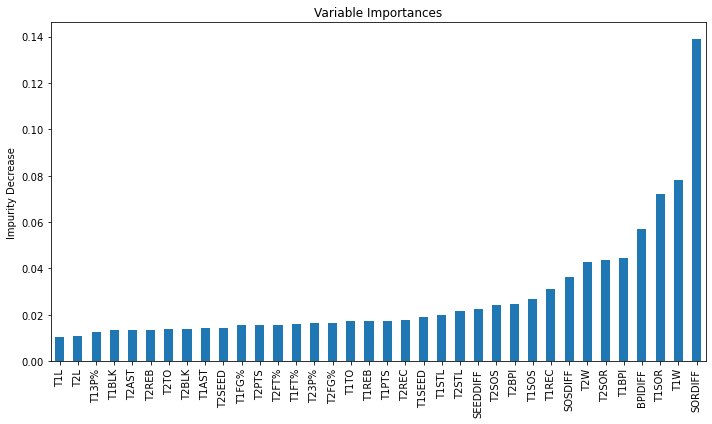

In [13]:
feature_names = list(df.columns[:-1])
forest_importances = pd.Series(importances, index=feature_names).sort_values()
fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Variable Importances")
ax.set_ylabel("Impurity Decrease")
fig.tight_layout()